# Homework #5  (Due 26 December 2022)

## Part-1

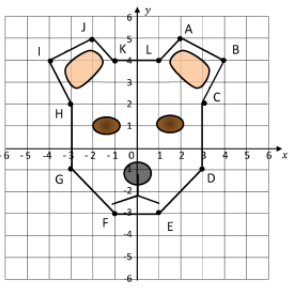

You will be applying a transformation on a set of points of the following image (50%).
<br>
a) Find the matrix that represents a rotation of 20 degrees in homogeneous coordinates. Perform a rotation of 20 degrees on the points and plot them. <br>
b) Find the matrix  that represents a translation of 2 in x direction, 1 in y direction degrees in homogeneous coordinates. Perform a translation in x of 2 and a translation in y of 1 over the points previously rotated. Plot the new obtained points.<br>
c) Find a transform that represents the operation of rotation of 20 degrees followed by a translation. Compare with the points on (b) and verify with a plot the match.<br>
d) Define a matrix that represents a translation of 2 in x and a translation of 1 in y, followed by a rotation of 20 degrees. Do the transformation over the initial set of points and plot.<br> 
e) Are the matrices obtained in (c) and (d) the same? Why?<br>

In [ ]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt

# define your points 
points = np.array([[2,5],[4,4],[3,2],[3,-1],[1,-3],[-1,-3],[-3,-1],[-3,2],[-4,4],[-2,5],[-1,4],[1,4]])

# represent your points in homogeneous coordinates (3 coordinates).

# make the points be in columns (you need to transpose them)

# define your rotation matrix here:
#R= np.array([[XX, XX, XX],[XX, XX, XX],[XX,XX,XX]])

# set up your plot
fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot original points to see everything looks correct
ax.plot(points[0,:],points[1,:],'r*')

# do the rotation
# you can use np.matmul

plt.plot(rotPoints[0,:],rotPoints[1,:],'bo')
plt.title('Original and rotated')
plt.show()

# define your translation matrix here:
#T= np.array([[XX, XX, XX],[XX, XX, XX],[XX,XX,XX]])

# translation + rotation
fig, ax = plt.subplots(ncols=2, figsize=(9, 4.5))
fig.suptitle('Rotation then translation')
#subplot 1
ax[0].clear()
ax[0].grid(True)
ax[0].axhline(0, color='blue')
ax[0].axvline(0, color='blue')
ax[0].set_aspect('equal')

#subplot 2
ax[1].clear()
ax[1].grid(True)
ax[1].axhline(0, color='blue')
ax[1].axvline(0, color='blue')
ax[1].set_aspect('equal')

# Compute translation over your rotated points
#np.matmul

ax[0].plot(tRotPoints[0,:],tRotPoints[1,:],'g*')

# Compute a single matrix for your rotation and translation
#tR = np.matmul

# Transform your points with a single matrix
#plot points
ax[1].plot(tRotPoints2[0,:],tRotPoints2[1,:],'y+')
plt.show()

#Also compute rotation followed by translation, and plot, and comment (d and e)



## Part-2

Now you will be doing warping with forward mapping for an image and will be implementing a nearest neighbor interpolation (50%).

a) Use the following homography matrix for forward warping of the grid points:  <br>
H=[[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],<br>
   [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],<br>
   [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]<br>
 <br> 
b) Visualize the obtained warped image in the range from 0 to 1000 in x and y. Comment about the appearance of the image. Does the image have gaps?<br>
c) Implement a forward nearest neighbor interpolation in the warped image. Visualize the interpolated image. Comment about the appereance of the interpolated image versus the initially warped image in (b).

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray

# load an image to warp
img = imread("https://raw.githubusercontent.com/cvrg-iyte/cvrg-iyte.github.io/master/assets/img/img2warp.jpg")

In [ ]:
# the values that can take y
i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)
# the values that can take x
j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)
# combination of values that can take x, and y in a grid
yv, xv = np.meshgrid(i, j)

# number of points on the grid
numpoints = xv.ravel().shape[0]
# Note: ravel() returns contiguous flattened array (1D array with all the 
# input-array elements and with the same type as it). 

# extract the color channels
r = img[yv.ravel(),xv.ravel(),0]
g = img[yv.ravel(),xv.ravel(),1]
b = img[yv.ravel(),xv.ravel(),2]

# Define Homography matrix 
H=np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
            [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
            [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]
)

# all the values of x coordinates as a row
x_cord = xv.ravel().reshape((1,numpoints))
# all the values of y coordinates as a row
y_cord = yv.ravel().reshape((1,numpoints))

# define the homogeneous coordinates
grid = np.concatenate((x_cord, y_cord, np.ones((1,numpoints))),axis=0)

# transform the grid (your canvas) in the new coordinated determined by the homography defined below
#newgrid = np.matmul(FILL,FILL)

# Convert from homogeneous to heterogeneous coordinates
# TO DO: complete the conversion. remember x=X/w
#newgridHetero[0,:]= COMPLETE IT
#newgridHetero[1,:]= COMPLETE IT

# Raw approximation. You can round your newgridHetero values to closest integer 
newgrid2 = ..

In [ ]:
# define your new empty canvas (it will have -1 if is not defined)
warped = -np.ones((1001,1001,3)).astype(np.int16)

# only consider points that are in your area of interest (0 to 1000)
validsX=np.bitwise_and(newgrid2[0,:]>=0,newgrid2[0,:]<1000)
validsY=np.bitwise_and(newgrid2[1,:]>=0,newgrid2[1,:]<1000)
valids = np.bitwise_and(validsX,validsY)

# assign color to the pixels that are valids
warped[newgrid2[1,valids],newgrid2[0,valids],0]=r[valids]
# TO DO: ASSIGN the remaining colors


plt.imshow(warped)
plt.show()

In [ ]:
# Nearest Neighbor interpolation
#(code below is not forward or backward mapping, we just make the pixels in 'warped' cover a larger area)

# You dont need to change anything in the code below

# your new canvas
warped2 = np.zeros((1001,1001,3)).astype(np.uint8)
# Area where we look for closest valid assignation
area2check=5

# loop over the valid area of the warped image
for i in range(area2check,warped.shape[0]-area2check):
    for j in range(area2check,warped.shape[1]-area2check):
        # check if the pixel has a valid warped value        
        if warped[i,j,0]==-1:  #need to look for neighbor
            distance = area2check*area2check+1  # assign a distance larger than any that can be found in the area to check
            
            # loop over all the possible neighbors
            for k in range(i-area2check,i+area2check):
                for l in range(j-area2check,j+area2check):
                    distancetested = (abs(k-i)+abs(l-j))  # L1 distance
                    if warped[k,l,0]>=0 and distancetested<distance:    # found a warped point , and it is closest
                        distance=distancetested
                        warped2[i,j]=warped[k,l]
        else:  #assign the valid warping
            warped2[i,j] =warped[i,j]
            
        
plt.imshow(warped2)
plt.show()
